# Tarea 1: Github (1 pto)



El cuaderno o cuadernos y toda el material relacionado con el trabajo será entregado en el repositorio github de la tarea. 


## Entregables

El grupo de alumnos (máximo 2 personas) debe entregar un documento explicativo de la realización de las tareas con las explicaciones y resultados más relevantes y el cuaderno o cuadernos necesarios para su realización. 

En el documento explicativo se debe incluir la respuesta a la cuestión teórica planteada al final de este cuaderno. 


La resolución de este trabajo comprende la resolución de las siguientes tareas y la entrega de la documentación asociada (documento explicativo y cuadernos de realización). 



# Tarea 2: SQL (2 ptos)


## 2.1 Inicio + Conexión


La base de datos que se utilizará será la que se accede a mediante la siguiente sentencia


In [ ]:
!gdown 1j_jqsGkup3UWeg3lHp49evb4KhbD6WIH

Downloading...
From: https://drive.google.com/uc?id=1j_jqsGkup3UWeg3lHp49evb4KhbD6WIH
To: /content/db-small.db
100% 12.1M/12.1M [00:00<00:00, 137MB/s]


El modelo de datos que sigue esta base de datos es el siguiente: 

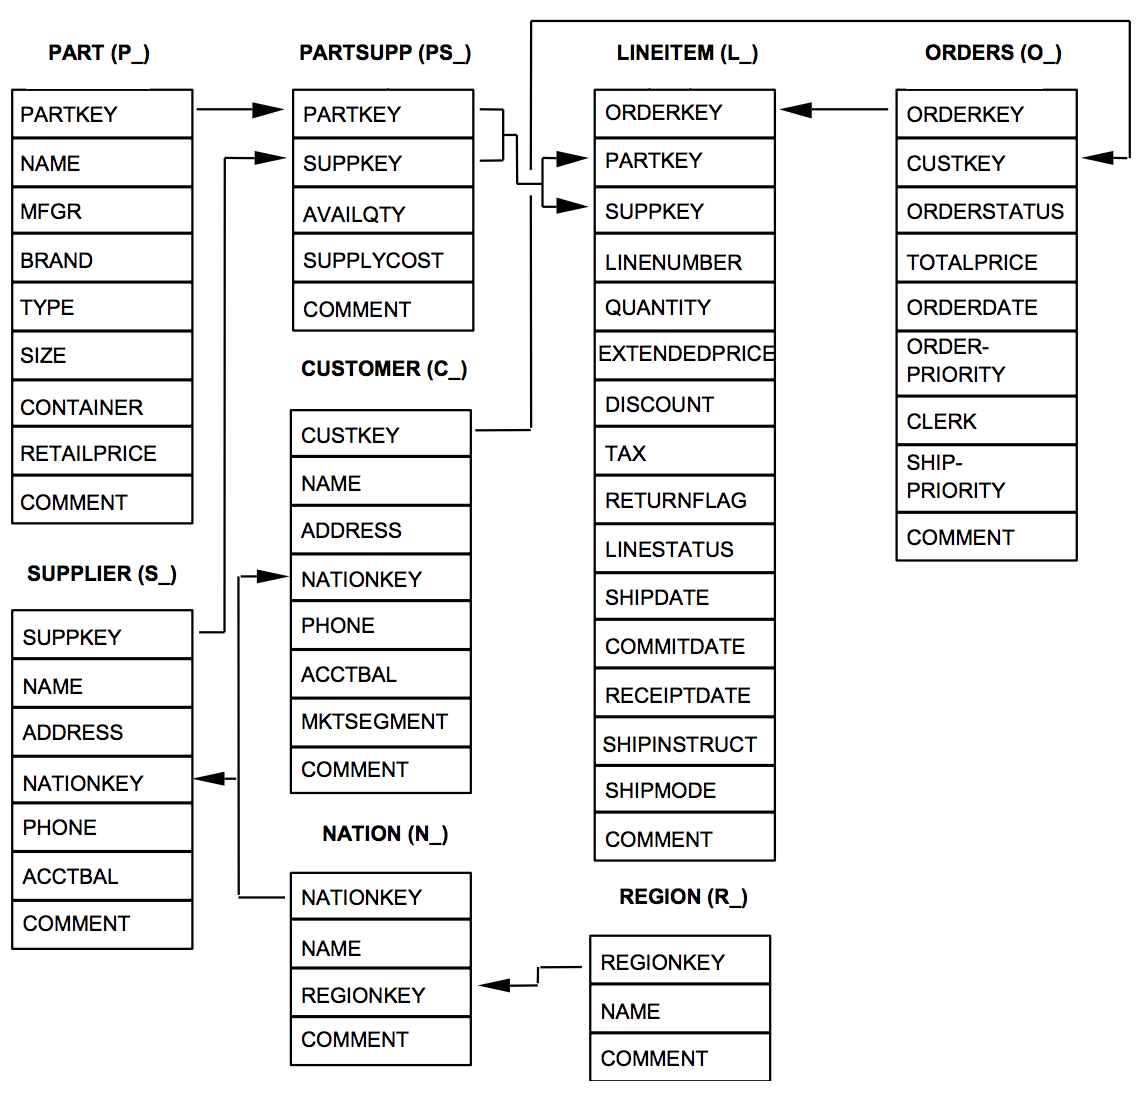

- los campos que terminan con **KEY** forman parte de la clave primaria de sus tablas o son clave ajena dentro de la misma.
- Los paréntesis que siguen al nombre de cada tabla contienen el prefijo de los nombres de las columnas de esa tabla.
- Las flechas apuntan en la dirección de las relaciones uno a muchos entre tablas;


Cargar la extensión de **sql**

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Conectar con la base de datos que se ha bajado

In [ ]:
%sql sqlite:///db-small.db

'Connected: @db-small.db'

A partir de aquí elaborar las siguientes consultas, si es necesario extraerlo de la propia base de datos. 

## 2.2:  Consulta al proveedor de coste mínimo

Esta consulta busca el proveedor que debe seleccionarse para realizar un pedido de una pieza determinada en una región determinada. 

La Consulta Proveedor Coste Mínimo busca, en una región determinada, para cada pieza de un tipo y tamaño determinados, el proveedor que puede suministrarla al coste mínimo. Si varios proveedores de esa región ofrecen el tipo y tamaño de pieza deseados al mismo coste (mínimo), la consulta ofrece como resultados las piezas de los proveedores con los saldos de cuenta más altos. 

Para cada proveedor, la consulta debe enumerar el saldo de cuenta, el nombre y el país del proveedor; el número y el fabricante de la pieza; la dirección, el teléfono y los comentarios del proveedor.



Ver tipo de datos que tenemos

In [ ]:
%%sql
SELECT name,type
FROM sqlite_master
WHERE type = 'table'

 * sqlite:///db-small.db
Done.


name,type
NATION,table
REGION,table
PART,table
SUPPLIER,table
PARTSUPP,table
CUSTOMER,table
ORDERS,table
LINEITEM,table


SUPPkey para identificar supplier más facilmente

In [ ]:
%%sql
SELECT a.S_SUPPKEY, S_NAME, S_ACCTBAL, min(PS_SUPPLYCOST), P_TYPE, P_SIZE, R_NAME
FROM SUPPLIER a, PARTSUPP b, PART c, NATION d, REGION e
WHERE a.S_SUPPKEY = b.PS_SUPPKEY
AND a.S_NATIONKEY = d.N_NATIONKEY
AND b.PS_PARTKEY = c.P_PARTKEY
AND d.N_REGIONKEY = e.R_REGIONKEY
GROUP BY P_TYPE, P_SIZE, R_NAME
ORDER BY P_TYPE, P_SIZE, PS_SUPPLYCOST, S_ACCTBAL DESC
LIMIT 15

 * sqlite:///db-small.db
Done.


S_SUPPKEY,S_NAME,S_ACCTBAL,min(PS_SUPPLYCOST),P_TYPE,P_SIZE,R_NAME
46,Supplier#000000046,3580.35,505.62,ECONOMY ANODIZED BRASS,2,AMERICA
6,Supplier#000000006,1365.79,515.9,ECONOMY ANODIZED BRASS,2,AFRICA
26,Supplier#000000026,21.18,562.09,ECONOMY ANODIZED BRASS,2,ASIA
66,Supplier#000000066,2455.98,699.68,ECONOMY ANODIZED BRASS,2,EUROPE
15,Supplier#000000015,308.56,331.7,ECONOMY ANODIZED BRASS,9,ASIA
67,Supplier#000000067,3576.55,920.2,ECONOMY ANODIZED BRASS,9,MIDDLE EAST
95,Supplier#000000095,2588.83,15.61,ECONOMY ANODIZED BRASS,11,EUROPE
89,Supplier#000000089,1638.02,160.7,ECONOMY ANODIZED BRASS,11,ASIA
78,Supplier#000000078,1044.1,243.45,ECONOMY ANODIZED BRASS,11,AFRICA
64,Supplier#000000064,1309.7,662.75,ECONOMY ANODIZED BRASS,11,AMERICA


Para cada proveedor, la consulta debe enumerar el saldo de cuenta, el nombre y el país del proveedor; el número y el fabricante de la pieza; la dirección, el teléfono y los comentarios del proveedor.

In [ ]:
%%sql
SELECT a.S_SUPPKEY, S_NAME,  N_NAME, S_ACCTBAL, c.P_PARTKEY, P_MFGR,  S_ADDRESS, S_PHONE, S_COMMENT
FROM SUPPLIER a, PARTSUPP b, PART c, NATION d
WHERE a.S_SUPPKEY = b.PS_SUPPKEY
AND a.S_NATIONKEY = d.N_NATIONKEY
AND b.PS_PARTKEY = c.P_PARTKEY
GROUP BY S_NAME, P_PARTKEY
ORDER BY S_SUPPKEY
LIMIT 15

 * sqlite:///db-small.db
Done.


S_SUPPKEY,S_NAME,N_NAME,S_ACCTBAL,P_PARTKEY,P_MFGR,S_ADDRESS,S_PHONE,S_COMMENT
1,Supplier#000000001,PERU,5755.94,25,Manufacturer#5,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,50,Manufacturer#3,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,75,Manufacturer#3,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,100,Manufacturer#3,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,122,Manufacturer#2,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,148,Manufacturer#3,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,174,Manufacturer#1,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,200,Manufacturer#5,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,219,Manufacturer#4,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful
1,Supplier#000000001,PERU,5755.94,246,Manufacturer#2,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",27-918-335-1736,each slyly above the careful


# Tarea 3: Análisis de Datos (4 ptos)






Considere el fichero [wine.csv](https://drive.google.com/file/d/1wdke9EYo6hhqnvKMmWq-CXwPH-Da-p4H/view?usp=sharing)

- Tamaño de la muestra **178** entradas
- Número de clases 3: **1,2,3** Columna *class*
- Parámetros medidos (13): **'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline'**
- Tipo de todos los parámteros: **float**
- *No hay valores perdidos*


## Tarea 3.1 Clustering (2 ptos)

Obtener mediante la utilización de un algoritmos de clustering (k-means) una división de los diferentes vinos en grupos (sin considerar el campo `class`). 

Se debe incluir el proceso de ejecución del clustering y el resultado de los análisis posteriores para su definición. 

La definición detallada de los grupos se puede realizar dentro del propio cuaderno o en el documento explicativo del trabajo.

**NOTA: Esta parte se puede hacer con Orange e incluir el report en el repositorio Github junto con el fichero de Orange**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random 

In [ ]:
wine= pd.read_csv('wine.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                  

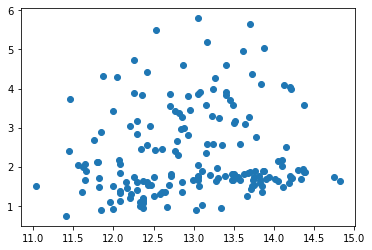

In [ ]:
cluster_data = wine[["Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols",	"Flavanoids",	"Nonflavanoid phenols",	"Proanthocyanins", "Color intensity",	"Hue",	"OD280/OD315 of diluted wines",	"Proline"]].copy(deep=True)
cluster_array = np.array(cluster_data)
print(cluster_data.head())
plt.scatter(cluster_array[:,0],cluster_array[:,1])

Estandarizamos datos y escala

escala importante ya que columna Proline datos muy grandes

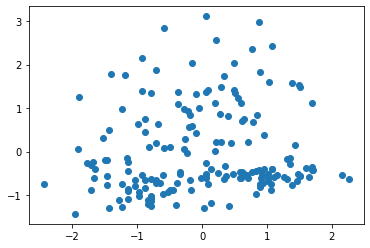

In [ ]:
standar = StandardScaler()
standar.fit(cluster_array)
scaled_data = standar.transform(cluster_array)
plt.scatter(scaled_data[:,0],scaled_data[:,1])

Hacemos k medias

Numero de iteraciones = 10 Y obtenemos centroides. random state semilla reproducible

[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


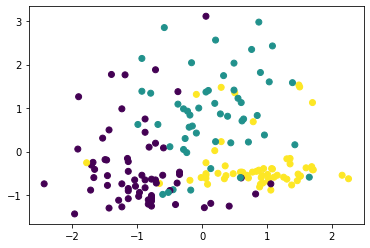

In [ ]:
KM=KMeans(n_clusters=3, n_init=10, random_state=1)
y_pred=KM.fit_predict(scaled_data)
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=y_pred)
print(KM.cluster_centers_)

## Tarea 3.2 Árboles de Decisión (2 puntos)


Construir un árbol de decisión (profundidad máxima 6) y salvarlo a un fichero wine.pdf con la representación gráfica  enriquecida mediante la librería **graphviz** con las siguientes características:

- Los nombres de las clases serán : clase 1= 'Tipo1', clase 2= 'Tipo2' y clase 3= 'Tipo3'
- Deben aparecer los nombres de los parámetros en lugar del número de dimensión (columna)

Posteriormente identificar los parámetros más discriminatorios e identificar aquellos parámetors inútiles para la clasificación.

Por último, clasificar los datos del fichero [Class_X.csv](https://drive.google.com/file/d/1M0qFFleo5VVF-i6bPw48wN5LX9CwuwIo/view?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz

In [ ]:
X= wine[["Class","Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols",	"Flavanoids",	"Nonflavanoid phenols",	"Proanthocyanins", "Color intensity",	"Hue",	"OD280/OD315 of diluted wines",	"Proline"]]

In [ ]:
y=X["Class"]
X=X.drop(["Class"],axis=1)

maxdepth = 6 para profundidad max

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Ad=DecisionTreeClassifier(criterion="gini",max_depth=6)
Ad=Ad.fit(X,y)

arbol en forma de texto

In [ ]:
r = export_text(Ad, feature_names=list(X.columns))
print(r)

|--- Proline <= 755.00
|   |--- OD280/OD315 of diluted wines <= 2.11
|   |   |--- Hue <= 0.94
|   |   |   |--- Flavanoids <= 1.58
|   |   |   |   |--- class: 3
|   |   |   |--- Flavanoids >  1.58
|   |   |   |   |--- class: 2
|   |   |--- Hue >  0.94
|   |   |   |--- Alcohol <= 13.51
|   |   |   |   |--- class: 2
|   |   |   |--- Alcohol >  13.51
|   |   |   |   |--- class: 3
|   |--- OD280/OD315 of diluted wines >  2.11
|   |   |--- Flavanoids <= 0.80
|   |   |   |--- class: 3
|   |   |--- Flavanoids >  0.80
|   |   |   |--- Alcohol <= 13.17
|   |   |   |   |--- class: 2
|   |   |   |--- Alcohol >  13.17
|   |   |   |   |--- Alcohol <= 13.36
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Alcohol >  13.36
|   |   |   |   |   |--- class: 2
|--- Proline >  755.00
|   |--- Flavanoids <= 2.17
|   |   |--- Hue <= 0.80
|   |   |   |--- class: 3
|   |   |--- Hue >  0.80
|   |   |   |--- class: 2
|   |--- Flavanoids >  2.17
|   |   |--- Color intensity <= 3.43
|   |   |   |--- class: 2

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.4210

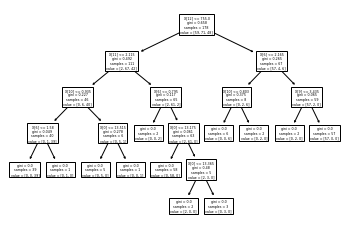

In [ ]:
tree.plot_tree(Ad)

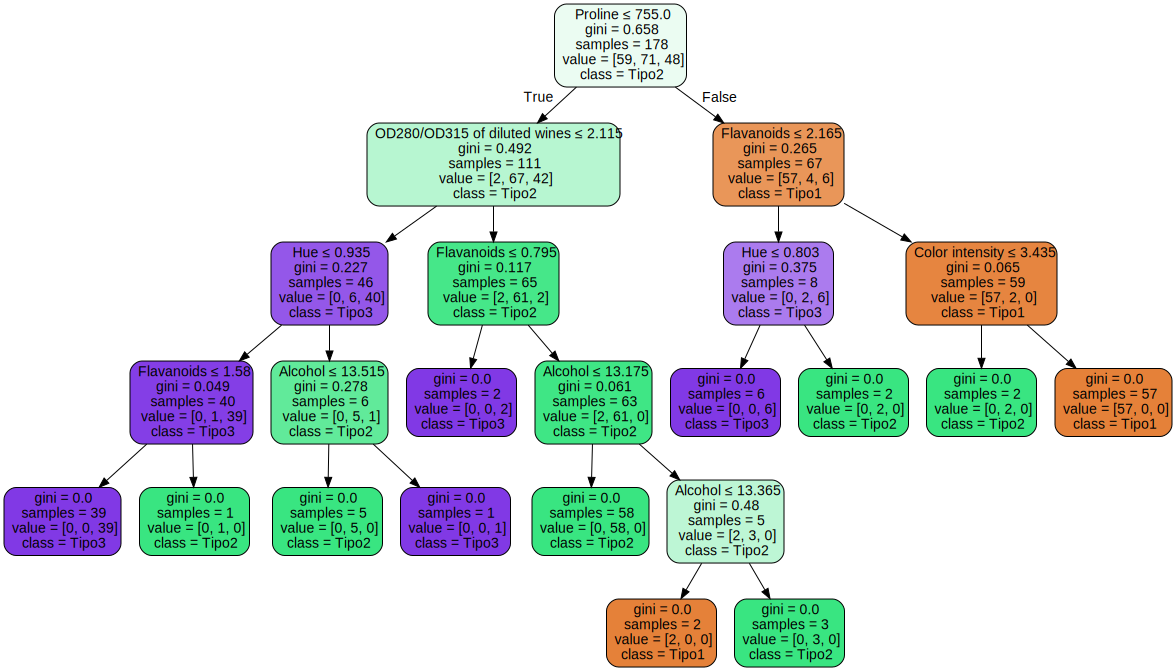

In [ ]:
dot_data = tree.export_graphviz(Ad, out_file=None,
                                feature_names=X.columns,
                                class_names=["Tipo1","Tipo2","Tipo3"],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("Tipos")
graph

Dividido por indice de Gini, cuanto más del tipo 3 más morado; tipo2 más verde, tipo 1 más naranja. Colores no muy fuertes contienen elementos de varios tipos pero predomina el del color.

Importancia de cada variable

In [ ]:
l=list(zip(list(X.columns), Ad.feature_importances_))
print(l)

[('Alcohol', 0.04727507393151268), ('Malic acid', 0.0), ('Ash', 0.0), ('Alcalinity of ash', 0.0), ('Magnesium', 0.0), ('Total phenols', 0.0), ('Flavanoids', 0.1414466773122087), ('Nonflavanoid phenols', 0.0), ('Proanthocyanins', 0.0), ('Color intensity', 0.0329784450464887), ('Hue', 0.08378677906228588), ('OD280/OD315 of diluted wines', 0.3120425747831769), ('Proline', 0.38247044986432716)]


Nuevas variables predecir de que tipo seran

In [ ]:
Clase = pd.read_csv("Class_X.csv")
Clase.head(1165)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
1,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260
2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
3,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
4,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
5,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
6,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
7,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
8,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
9,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285


In [ ]:
Ad.predict(Clase.values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1])

Predice tipo 2, 1, 2,..

# Tarea 4: Análisis Libre (2 ptos)

Se propone la resolución de un problema libre sobre los datos bancarios que se han utilizado mediante la  aplicación de las técnicas vistas en clase.

Los pasos a realizar para su resolución serían los siguientes:  
0. Planteamiento del problema. 
1. Selección de los datos correspondientes de la BD
2. Planteamiento y resolución del problema: clasificación bayesiana, razonamiento borroso, clustering, clasificación. 

**NOTAS:**
* Se podrá realizar en un cuaderno independiente al resto de tareas
* Esta parte se puede hacer con Orange e incluir el report en el repositorio Github junto con el fichero de Orange.




Intentar predecir tipo de tarjeta. Asi si tiene una inferior se le puede ofrecer una superior.

# Tarea 5: Derechos Digitales y Protección de datos (1 pto)

(Incluir en el documento explicativo) 

Realizar un breve informe/resumen sobre **uno** de los siguientes temas/documentos. 

2. **Reglamento General de Protección de Datos (RGPD) de la Unión Europea (UE)**: Todos los negocios que trabajan con datos personales deben tener en cuenta que estos deben estar protegidos bajo la nueva regulación de protección de datos que rige dentro de la Unión Europea. Dado que esto afecta a los profesionales de diferentes áreas entre ellas la financiera se propone el análisis de las consecuencias que esta ley tiene su trabajo diario con los datos.
[Documento](https://campusvirtual.uclm.es/pluginfile.php/2093325/mod_resource/content/0/RGPD%20para%20directores%20financieros.pdf)


2. **Carta de Derechos Digitales**: Elaborada por la Secretaría de Estado de Digitalización y de Inteligencia Artificial. 
[Documento](https://www.lamoncloa.gob.es/presidente/actividades/Documents/2021/140721-Carta_Derechos_Digitales_RedEs.pdf)

Este informe debe consistir en un resumen del contenido del documento (1 página) y un resumen gráfico (esquema/mapa mental) del mismo.










